In [49]:
%matplotlib inline
import pylab as plt
import numpy as np
import pandas
import seaborn as sns
sns.set(style="white", color_codes=True)

In [50]:
case_study = pandas.read_csv("201610_dataset_case_study.csv",sep=";")

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
case_study.head()

,TARGET,compcde_cat,PK_cat,Amount,Itemnum,PMMTHD_cat,Month,Day of month,Sub Activity_cat,GBU_cat,...,OD_Due_Date_vs_CL_EUR,OD_Due_Date_vs_Rec_CL_EUR,Relative_Amount_vs_OD,Amount_ratio_Late_OD,Nb_distinct_clear_dates,AVG_delay_over_remaining_days_distinct,Rate_distinct_Not_PIM_last3,AVG_delay_over_remaining_days_distinct_last3,Rate_distinct_Not_PIM_last10,AVG_delay_over_remaining_days_distinct_last10
0,1,7523,1,29608.077574,1,9,3,21,IECRA00745,ZSECT00064,...,29608.077574,0.592161,1,0.0,293.0,0.452500,0.00,0.200000,0.0,0.375000
1,1,134,1,3204.260083,1,A,9,1,7360,PE,...,NaN,NaN,NaN,NaN,71.0,0.245689,0.00,NaN,0.0,0.137931
2,1,5794,1,1274.426600,4,Not Available,5,25,3400,PT,...,NaN,NaN,82.9583,0.024486,478.0,0.453102,0.00,0.291666,0.0,0.303030
3,1,6070,1,2106.000000,1,A,7,9,7270,CH,...,NaN,NaN,NaN,NaN,5.0,0.463636,0.75,0.568181,0.6,0.463636
4,1,5794,1,3632.711252,1,A,2,5,3400,PT,...,1.282944,0.256588,3.53164,0.0,87.0,0.077211,0.00,0.086956,0.0,0.076086


In [52]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(case_study, test_size = 0.2)

In [53]:
print(train["TARGET"].mean())
print(test["TARGET"].mean())

0.844683452036
0.842662333718


In [54]:
print(train.count())

TARGET                                           263404
compcde_cat                                      263404
PK_cat                                           263404
Amount                                           263404
Itemnum                                          263404
PMMTHD_cat                                       263404
Month                                            263404
Day of month                                     263404
Sub Activity_cat                                 263404
GBU_cat                                          263404
Exchange_rate                                    263400
Country_cat                                      263404
Dc_cat                                           263404
Lc_cat                                           263404
Dblocked                                         263404
PT                                               263404
StdPT                                            263403
0G_CWWE13_cat                                   

In [55]:
train["compcde_cat"].value_counts()

5       20178
7523    17273
1419    16514
5794    14514
3389    13119
974     11183
7424    10816
ZFR3     9375
4290     9343
309      8333
292      7719
6019     6587
5672     6224
5835     5925
270      5791
5696     5556
5782     4830
5622     4772
134      3801
4058     3693
6526     3252
6070     3095
5876     3012
7525     2864
1424     2700
3384     2645
1425     2585
1428     2485
ZUS4     2425
7811     2343
        ...  
6882       19
5916       17
1892       17
274        16
6063       16
6268       15
1423       15
294        14
7735       11
5985       11
5881       10
6277       10
5586       10
6056        9
7728        9
6283        8
1688        8
5983        7
1429        6
231         6
5872        6
6291        5
6864        4
5884        4
6859        2
5686        2
4045        2
5792        1
5649        1
5976        1
Name: compcde_cat, dtype: int64

## Select categorical key

In [56]:
category = []
for columns in  train.columns.values:
    v = train[columns][:20000]
    if str(v.dtype) == "object" and len(set(v)) < 500: 
        s  = set(train[columns])
        print(columns,len(s),s)
        category.append(columns)

compcde_cat 164 {'6078', '6882', '6070', '5736', '8090', '134', '3389', '270', '5053', '3459', '6526', '6975', '6062', '5872', '3468', '360', '5846', '279', '4056', '7651', '5916', '1196', '5642', '5735', '5876', '6283', '5957', '4058', '6063', '244', '5672', '5726', '5586', '1427', '1426', '7531', '5711', '5720', '274', '197', '5763', '1423', '5955', '5696', 'ZVE1', '5993', '276', '5622', '6046', '5697', '237', '6289', '6857', '6299', '5960', '240', '3471', '306', '5881', '5756', '245', '5649', '231', '1424', '3383', '7523', '1419', '8485', '5985', '6875', '7525', '5685', '974', '5983', '7728', '6301', '5782', '3438', '6268', '7405', '6020', '3384', '7811', '5792', '1429', '7797', '1688', '3470', 'ZUS4', '6864', '366', '7580', '6233', '1', '307', '5991', '5869', '6034', 'ZFR9', '3443', '4061', '294', '125', '387', '6019', '6811', '345', '5884', '6277', '4060', '6304', '7735', '7810', '7898', '6290', '6291', '6859', '7154', '7621', '3865', '1422', '6348', '7418', '3469', '6746', '5978'

## Clean numerical keys

In [57]:
def clean(iv):
    #Get read of the "1E-6" values
    try:
        float(iv)
        return float(iv)
    except:
        if "," in iv:
            iv = iv.replace(",",".")
        return float(iv)

def clean_and_standardized(dataf,key,mean=None,std=None):
    dataf.loc[:,key] = dataf.loc[:,key].apply(clean)
    if mean is None:
        mean = dataf.loc[:,key].mean()
    if std is None:
        std = dataf.loc[:,key].std()
        
    dataf.loc[:,key] = dataf.loc[:,key].replace(np.nan,mean)
    dataf.loc[:,key] = (dataf.loc[:,key] - mean)/std
    dataf.loc[:,key].replace(np.nan,mean)
    return mean,std

In [58]:
for column in train.columns.values:
    if column not in category and column != "TARGET": 
        mean, std = clean_and_standardized(train, column)
        clean_and_standardized(test, column, mean, std)

/usr/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
print(train.count())

TARGET                                           263404
compcde_cat                                      263404
PK_cat                                           263404
Amount                                           263404
Itemnum                                          263404
PMMTHD_cat                                       263404
Month                                            263404
Day of month                                     263404
Sub Activity_cat                                 263404
GBU_cat                                          263404
Exchange_rate                                    263404
Country_cat                                      263404
Dc_cat                                           263404
Lc_cat                                           263404
Dblocked                                         263404
PT                                               263404
StdPT                                            263404
0G_CWWE13_cat                                   

In [60]:
for k in category:
    print(k,"\n",train.loc[:,k].value_counts()[:10])

compcde_cat 
 5       20178
7523    17273
1419    16514
5794    14514
3389    13119
974     11183
7424    10816
ZFR3     9375
4290     9343
309      8333
Name: compcde_cat, dtype: int64
PMMTHD_cat 
 Not Available    139787
A                 38598
1                 26397
1.0               20003
&                 10078
Y                  8473
3                  4439
B                  3775
9                  2343
L                  1565
Name: PMMTHD_cat, dtype: int64
Sub Activity_cat 
 3390    20205
7310    19408
3400    15660
7250    15370
7360    13644
3440    13186
7470    11648
3940    11472
3490     7934
3100     7744
Name: Sub Activity_cat, dtype: int64
GBU_cat 
 VI                      40319
SD                      30974
CC                      23654
VM                      22732
ZSECT00011              21465
SP                      17965
PT                      15660
PE                      14728
ZSECT00077              14147
CH                      13513
Name: GBU_cat, dtype: in

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


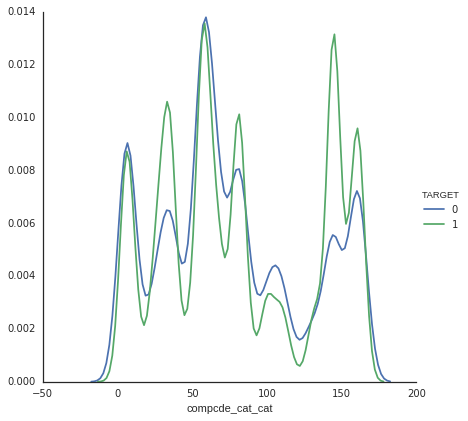

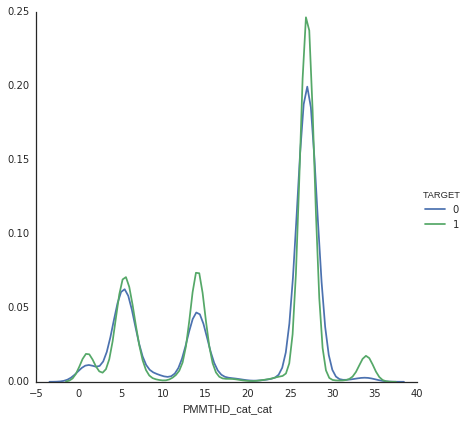

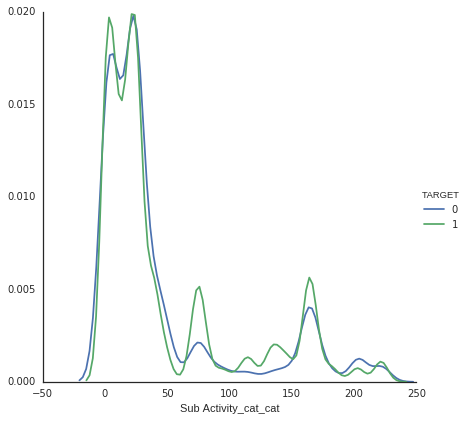

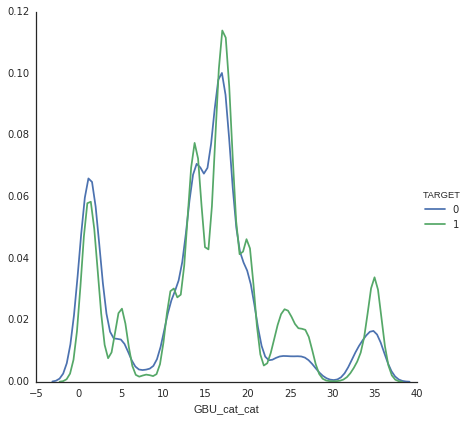

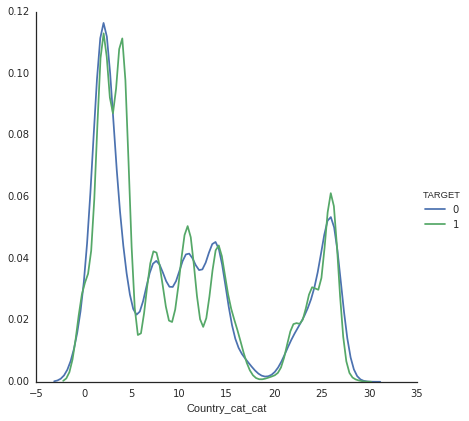

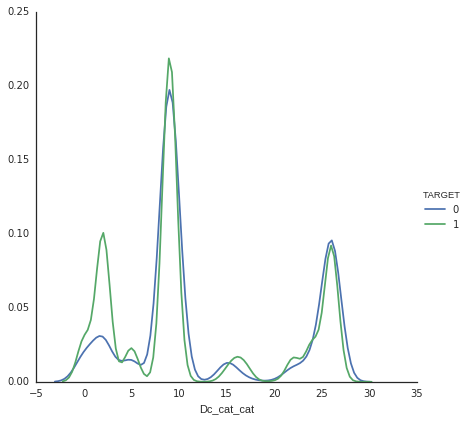

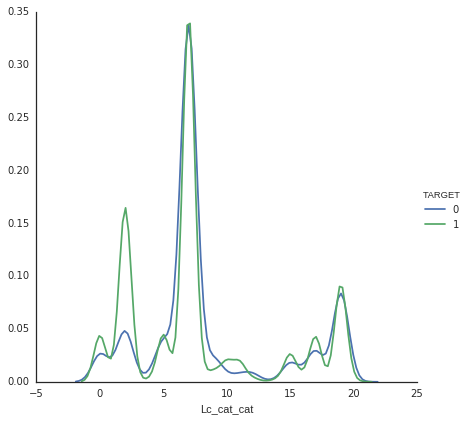

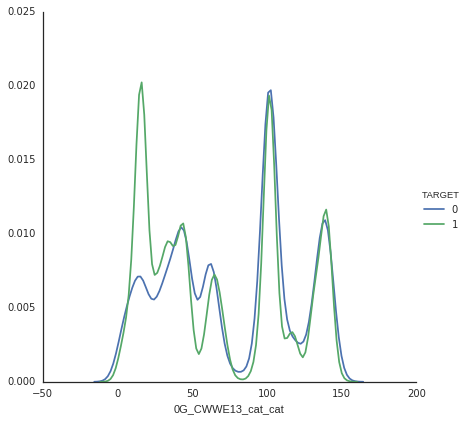

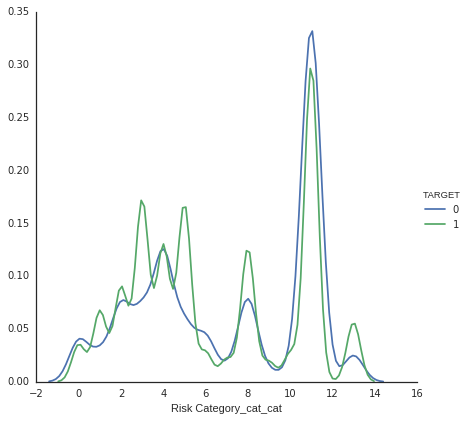

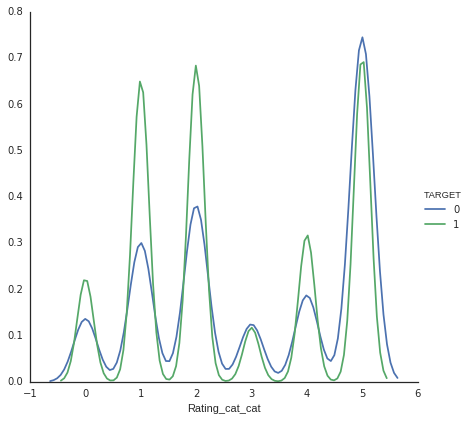

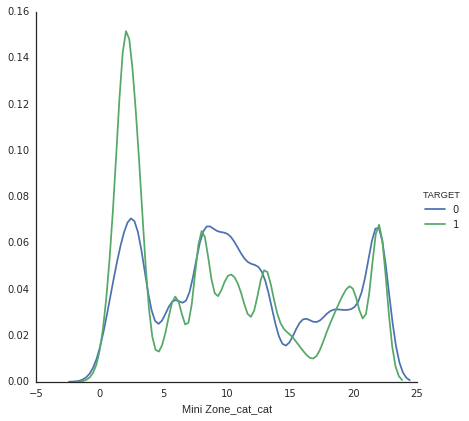

In [63]:
#Try some visualisation of categories
from sklearn import preprocessing
for k0 in category:
    le = preprocessing.LabelEncoder()
    le.fit(np.concatenate((train.loc[:,k0],test.loc[:,k0])))
    train[k0+"_cat"] = le.transform(train.loc[:,k0])
    test[k0+"_cat"] = le.transform(test.loc[:,k0])
    sns.FacetGrid(train, hue="TARGET", size=6).map(sns.kdeplot, k0+"_cat").add_legend()

In [ ]:
#sns.pairplot(train[[k0+"_cat","TARGET"]], hue="TARGET", size=3)
sns.FacetGrid(train, hue="TARGET", size=6).map(sns.kdeplot, k0+"_cat").add_legend()

In [ ]:
a = train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                        .index.values].hist(figsize=[20,20])

In [ ]:
oc = list(train.columns.values)
for c in category:
    train.pop(c)
    #oc.remove(c)
train.to_csv("./train.csv")

In [64]:
for c in category:
    test.pop(c)
test.to_csv("./test.csv")

In [ ]:
from pandas.tools.plotting import radviz
radviz(train.drop(category, axis=1), "TARGET")
